In [1]:
import numpy as np, prjlib, binning as bins, plottools as pl
from matplotlib.pyplot import *

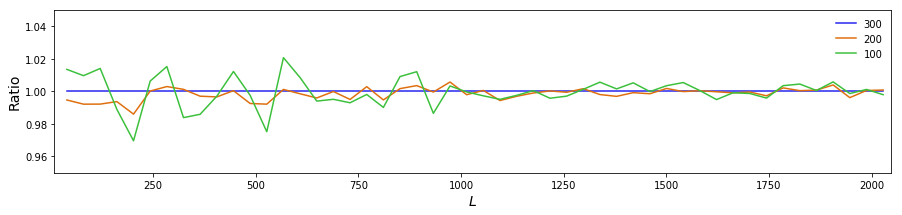

In [2]:
p, f = prjlib.filename_init(doreal='False',stype='lcmb')
mb = bins.multipole_binning(50,lmin=20)
pl.plot_1dstyle(ylab=r'Ratio',fsize=[15,3],xmin=10,xmax=2048,ymin=.95,ymax=1.05)
for si, s in enumerate([300,200,100]):
    rd = np.loadtxt(p.quad.f['EB'].rdn0[1].replace('_n200','').replace('.dat','_snrd'+str(s).zfill(3)+'.dat'),unpack=True)[1]
    rdb = bins.binning(rd,mb)
    if si==0: rd0=rdb
    plot(mb.bc,rdb/rd0,label=str(s))
legend(loc=0,frameon=False)
#savefig('fig_n0.png')

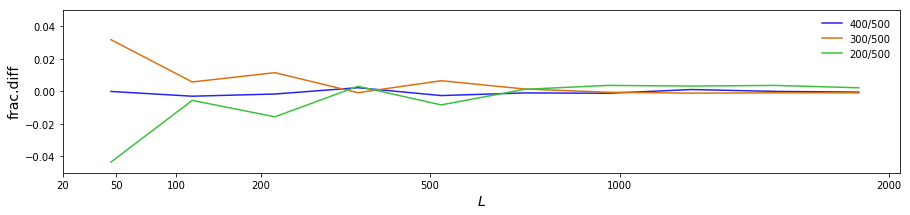

In [3]:
p, f = prjlib.filename_init(doreal='True',dearot='True',stype='lcmb')
mb = bins.multipole_binning(10,lmin=20,lmax=2048,spc='p2')
pl.plot_1dstyle(ylab=r'frac.diff',spc='p2',xmin=20,xmax=2048,ymin=-.05,ymax=0.05)
rd0 = prjlib.binned_cl(p.quad.f['EB'].rdn0[0].replace('_n200','_n500').replace('.dat','_old.dat'),mb)
rd1 = prjlib.binned_cl(p.quad.f['EB'].rdn0[0].replace('_n200','_n400').replace('.dat','_old.dat'),mb)
rd2 = prjlib.binned_cl(p.quad.f['EB'].rdn0[0].replace('_n200','_n300').replace('.dat','_old.dat'),mb)
rd3 = prjlib.binned_cl(p.quad.f['EB'].rdn0[0],mb)
plot(np.sqrt(mb.bc),rd1/rd0-1,label='400/500')
plot(np.sqrt(mb.bc),rd2/rd0-1,label='300/500')
plot(np.sqrt(mb.bc),rd3/rd0-1,label='200/500')
legend(loc=0,frameon=False)